<a href="https://colab.research.google.com/github/rijema/PredictCovid/blob/main/PREVISAO_OWID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


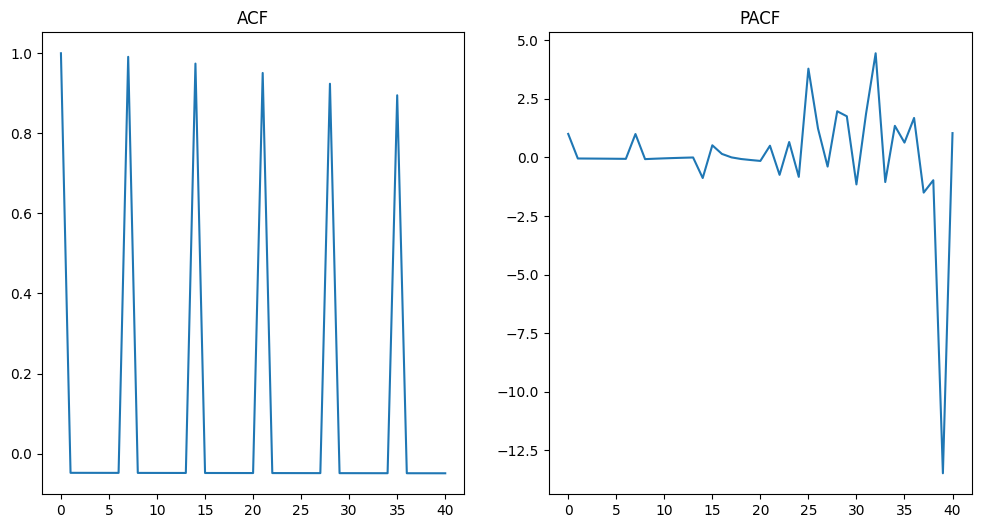

ADF Statistic: -2.470160763784728
p-value: 0.1229043456830225


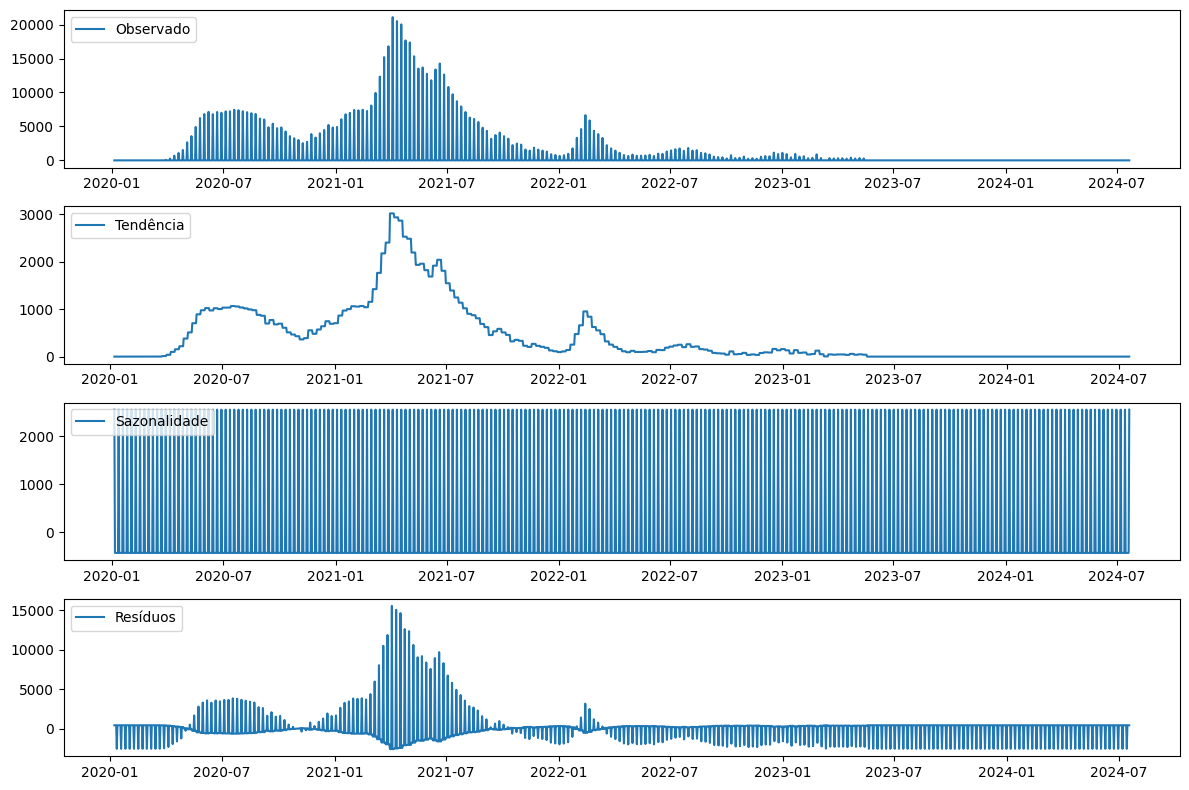

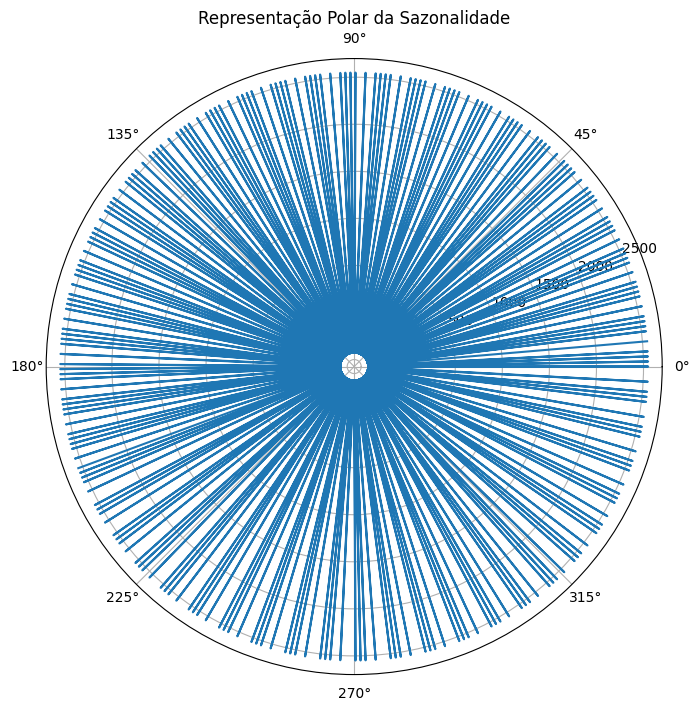

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Brazil   No. Observations:                 1660
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -14357.178
Date:                Mon, 05 Aug 2024   AIC                          28736.356
Time:                        16:34:52   BIC                          28795.909
Sample:                    01-05-2020   HQIC                         28758.430
                         - 07-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1445      0.075     -1.933      0.053      -0.291       0.002
ar.L2         -0.6772      0.059    -11.459      0.000      -0.793      -0.561
ar.L3         -0.4990      0.093     -5.381      0.0

In [1]:
!pip install pmdarima


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# PEGANDO OS DADOS DO GITHUB DO OWID
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/new_deaths.csv'
df = pd.read_csv(url)

# Pré-processamento e TRATAMENTO de dados
country = 'Brazil'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
daily_deaths = df[country].dropna()

# 3. Análise de autocorrelação
plt.figure(figsize=(12, 6))
plt.subplot(121)
acf_plot = acf(daily_deaths, nlags=40)
plt.plot(acf_plot)
plt.title('ACF')

plt.subplot(122)
pacf_plot = pacf(daily_deaths, nlags=40)
plt.plot(pacf_plot)
plt.title('PACF')
plt.show()

# Teste de Dickey-Fuller para verificar estacionaridade
result = adfuller(daily_deaths)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# 4. Decomposição Sazonal
decomposition = seasonal_decompose(daily_deaths, model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observado')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Resíduos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Representação Polar da Sazonalidade
seasonal_data = decomposition.seasonal
days = seasonal_data.index.dayofyear
rads = np.deg2rad(days * 360 / 365)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(rads, seasonal_data)
ax.set_title('Representação Polar da Sazonalidade')
plt.show()

# 5. Ajuste dos modelos ARIMA e SARIMA
# ARIMA
arima_model = ARIMA(daily_deaths, order=(5, 1, 5))
arima_fit = arima_model.fit()
print(arima_fit.summary())



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1660
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood              -13969.342
Date:                              Mon, 05 Aug 2024   AIC                          27956.683
Time:                                      12:18:00   BIC                          28005.409
Sample:                                  01-05-2020   HQIC                         27974.744
                                       - 07-21-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6375     45.822     -0.014      0.989     -90.446      89.171
ar.L1         -1.79

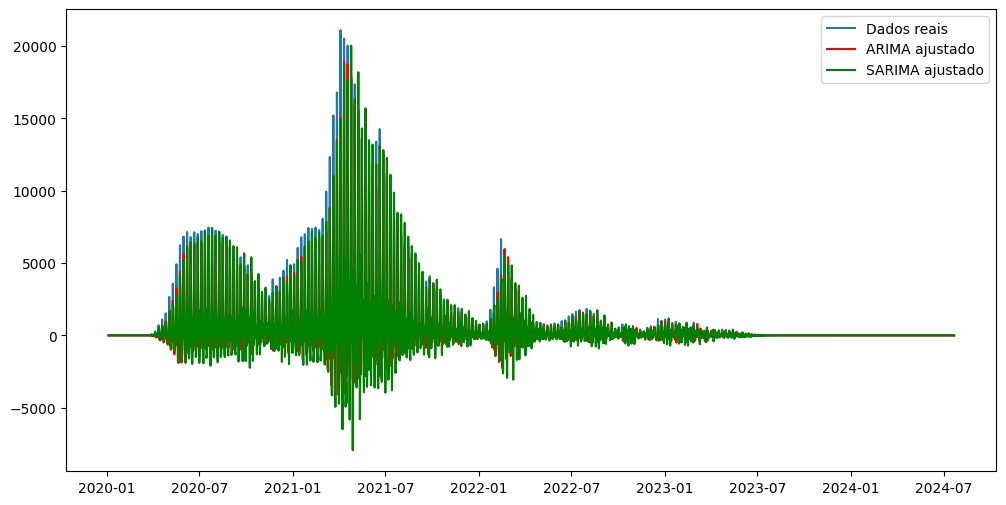

NameError: name 'sarima_fit' is not defined

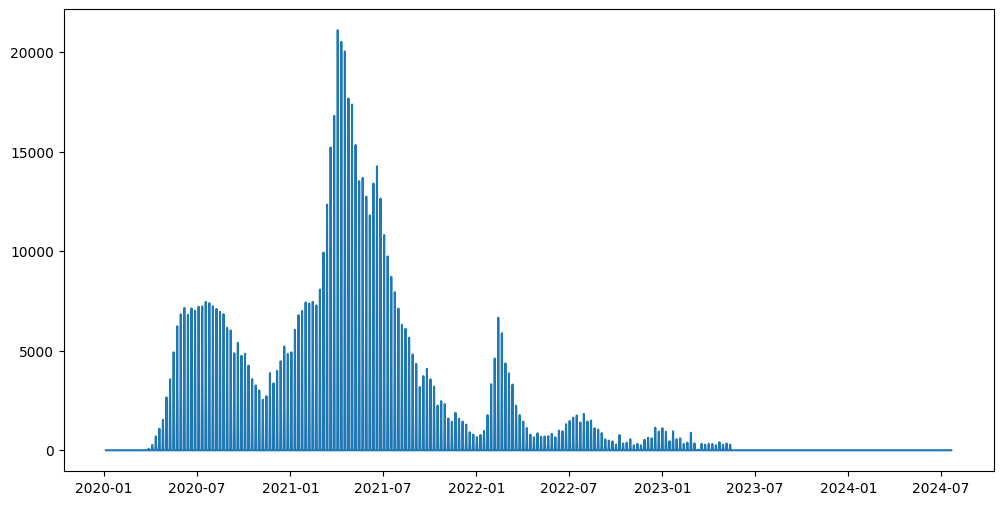

In [ ]:

# SARIMA
sarima_model = auto_arima(daily_deaths, seasonal=True, m=12)
print(sarima_model.summary())

# 6. Avaliação e visualização dos resultados
plt.figure(figsize=(12, 6))
plt.plot(daily_deaths, label='Dados reais')
plt.plot(arima_fit.fittedvalues, color='red', label='ARIMA ajustado')
plt.plot(sarima_model.predict_in_sample(), color='green', label='SARIMA ajustado')
plt.legend()
plt.show()

# 7. Previsão futura com SARIMA
n_periods = 30  # número de dias para prever
sarima_forecast = sarima_model.predict(n_periods=n_periods)
forecast_index = pd.date_range(daily_deaths.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(daily_deaths, label='Dados reais')
plt.plot(sarima_fit.fittedvalues, color='green', label='SARIMA ajustado')
plt.plot(forecast_index, sarima_forecast, color='blue', label='SARIMA previsão')
plt.legend()
plt.show()

In [ ]:
import numpy as np

n_periods = 60
sarima_forecast = sarima_model.predict(n_periods=n_periods)

mean_forecast = np.mean(sarima_forecast)

print(f'Previsão média de mortes para os próximos {n_periods} dias: {mean_forecast}')

NameError: name 'sarima_forecast' is not defined

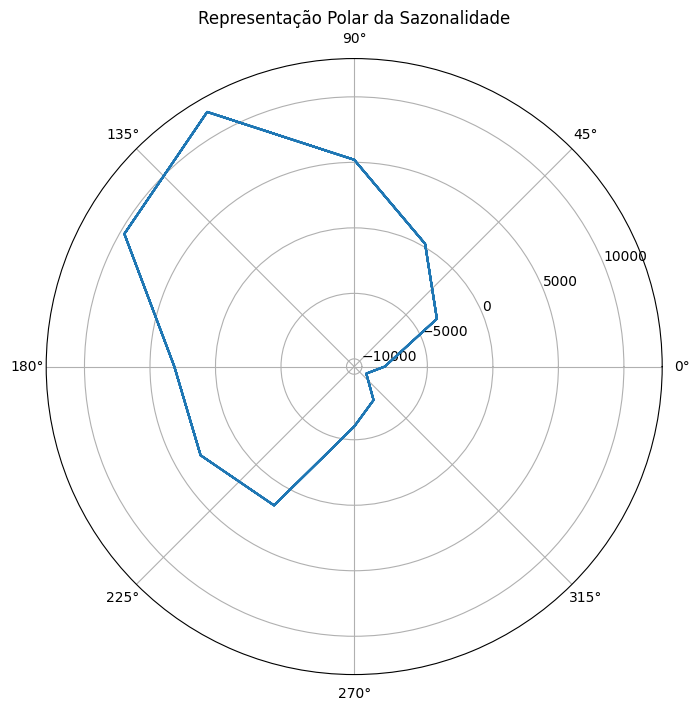

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Carregar os dados
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/new_deaths.csv'
df = pd.read_csv(url)

# 2. Pré-processamento e tratamento de dados
country = 'Brazil'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
daily_deaths = df[country].dropna()

# 3. Agregar os dados por mês
monthly_deaths = daily_deaths.resample('M').sum()

# 4. Decomposição Sazonal
decomposition = seasonal_decompose(monthly_deaths, model='additive')
seasonal_data = decomposition.seasonal

# 5. Criar a representação polar
months = seasonal_data.index.month
rads = np.deg2rad(months * 360 / 12)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(rads, seasonal_data)
ax.set_title('Representação Polar da Sazonalidade')
plt.show()

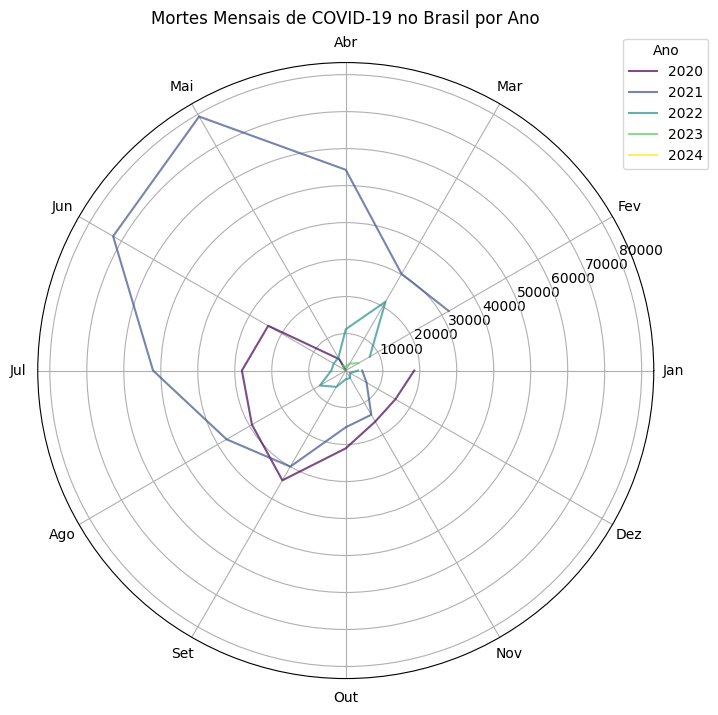

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar os dados
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/new_deaths.csv'
df = pd.read_csv(url)

# 2. Pré-processamento e tratamento de dados
country = 'Brazil'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
daily_deaths = df[country].dropna()

# 3. Agregar os dados por mês e ano
monthly_deaths = daily_deaths.resample('M').sum().reset_index()
monthly_deaths['year'] = monthly_deaths['date'].dt.year
monthly_deaths['month'] = monthly_deaths['date'].dt.month

# 4. Criar gráfico polar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Cores para cada ano
unique_years = monthly_deaths['year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))

for i, year in enumerate(unique_years):
    monthly_data = monthly_deaths[monthly_deaths['year'] == year]
    months = monthly_data['month']
    rads = np.deg2rad(months * 360 / 12)

    # Corrigido: use 'daily_deaths' como o nome da coluna de mortes
    ax.plot(rads, monthly_data[country], color=colors[i], label=str(year), alpha=0.7)

# Configurar título e legendas
ax.set_title('Mortes Mensais de COVID-19 no Brasil por Ano', va='bottom')
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))  # Ticks para meses
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax.legend(title='Ano', bbox_to_anchor=(1.1, 1.05))

plt.show()
